[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [2]:
import anon
#anon.conf.config.update('jax_disable_jit', True)
import elle.sections
import emme as em

In [3]:
# column_section = em.aisc.load("w14x159")
# girder_section = em.aisc.load("w33x130")
column_section = {"A": 576.0, "I": 27_648.0}
girder_section = {"A": 684.0, "I": 34_383.8}

In [4]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

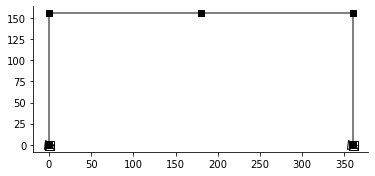

In [5]:
# Set up nodes
E = 3.6e3
ft = 12
B, H = 30.*ft, 13.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", **column_section,E=E)
model.beam("b", "2", "3", **girder_section,E=E)
model.beam("c", "3", "4", **girder_section,E=E)
model.beam("d", "4", "5", **column_section,E=E)

model.boun("1", [1,1,1]) 
model.boun("5", [1,1,1])

model.load("2", 20.0, dof="x")

em.plot_structure(model);

In [6]:
f = model.compose()

In [11]:
U = f()
U

DeviceArray([[ 0.0551163 ],
             [ 0.00024871],
             [-0.00029532],
             [ 0.05439212],
             [-0.00049367],
             [ 0.00014284],
             [ 0.05366794],
             [-0.00024871],
             [-0.00028435]], dtype=float64)

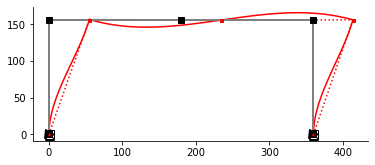

In [8]:
fig, ax = em.plot_displ(model, U, scale=1e3)

In [9]:
model.delems["a"].ke_matrix()

,$u_10$,$u_11$,$u_12$,$u_1$,$u_2$,$u_3$
$u_10$,314.61083,0.00000,-2.453964e+04,-314.61083,0.00000,-2.453964e+04
$u_11$,0.00000,13292.30769,0.000000e+00,0.00000,-13292.30769,0.000000e+00
$u_12$,-24539.64497,0.00000,2.552123e+06,24539.64497,0.00000,1.276062e+06
$u_1$,-314.61083,0.00000,2.453964e+04,314.61083,0.00000,2.453964e+04
$u_2$,0.00000,-13292.30769,0.000000e+00,0.00000,13292.30769,0.000000e+00
$u_3$,-24539.64497,0.00000,1.276062e+06,24539.64497,0.00000,2.552123e+06


In [10]:
em.K_matrix(model)

,$1$,$2$,$3$,$4$,$5$,$6$,$7$,$8$,$9$,$10$,$11$,$12$,$13$,$14$,$15$
$P_{1}$,13994.61083,0.00000,2.453964e+04,-13680.0,0.00000,0.000000e+00,0.00000,0.00000,0.000000e+00,-314.61083,0.00000,2.453964e+04,0.00000,0.00000,0.000000e+00
$P_{2}$,0.00000,13547.00251,2.292253e+04,0.0,-254.69481,2.292253e+04,0.00000,0.00000,0.000000e+00,0.00000,-13292.30769,0.000000e+00,0.00000,0.00000,0.000000e+00
$P_{3}$,24539.64497,22922.53333,5.302827e+06,0.0,-22922.53333,1.375352e+06,0.00000,0.00000,0.000000e+00,-24539.64497,0.00000,1.276062e+06,0.00000,0.00000,0.000000e+00
$P_{4}$,-13680.00000,0.00000,0.000000e+00,27360.0,0.00000,0.000000e+00,-13680.00000,0.00000,0.000000e+00,0.00000,0.00000,0.000000e+00,0.00000,0.00000,0.000000e+00
$P_{5}$,0.00000,-254.69481,-2.292253e+04,0.0,509.38963,0.000000e+00,0.00000,-254.69481,2.292253e+04,0.00000,0.00000,0.000000e+00,0.00000,0.00000,0.000000e+00
$P_{6}$,0.00000,22922.53333,1.375352e+06,0.0,0.00000,5.501408e+06,0.00000,-22922.53333,1.375352e+06,0.00000,0.00000,0.000000e+00,0.00000,0.00000,0.000000e+00
$P_{7}$,0.00000,0.00000,0.000000e+00,-13680.0,0.00000,0.000000e+00,13994.61083,0.00000,2.453964e+04,0.00000,0.00000,0.000000e+00,-314.61083,0.00000,2.453964e+04
$P_{8}$,0.00000,0.00000,0.000000e+00,0.0,-254.69481,-2.292253e+04,0.00000,13547.00251,-2.292253e+04,0.00000,0.00000,0.000000e+00,0.00000,-13292.30769,0.000000e+00
$P_{9}$,0.00000,0.00000,0.000000e+00,0.0,22922.53333,1.375352e+06,24539.64497,-22922.53333,5.302827e+06,0.00000,0.00000,0.000000e+00,-24539.64497,0.00000,1.276062e+06
$P_{10}$,-314.61083,0.00000,-2.453964e+04,0.0,0.00000,0.000000e+00,0.00000,0.00000,0.000000e+00,314.61083,0.00000,-2.453964e+04,0.00000,0.00000,0.000000e+00
